### Setting up the environment Initialization of the Ontology editor

In [1]:
from cognipy.ontology import Ontology #the ontology processing class
from cognipy.ontology import CQL #SPARQL format tailored for Contolled Natural Language
from cognipy.ontology import encode_string_for_graph_label #complex datatypes encoder for the graph labels in graph visualisation
import textwrap
import pandas as pd
def graph_attribute_formatter(val):
    if isinstance(val,list) or isinstance(val,set):
        return " | ".join(list(map(lambda i:encode_string_for_graph_label(graph_attribute_formatter(i)),val)))
    elif isinstance(val,dict):
        return " | ".join(list(map(lambda i:i[0]+" : "+encode_string_for_graph_label(graph_attribute_formatter(i[1])),val.items())))
    else:
        return encode_string_for_graph_label(textwrap.fill(str(val),40))
    
    
    
#simple_it=pd.read_xml('Simple IT infrastructure example.xml')
#simple_it_pd=pd.read_pickle('simple_it.pkl')

**Simple_IT_infrastructure**

Loading the editor for the Simple IT infrastructure. The Ontology is developed by Cognitum and explains the basic relations between applications serving clients. The infrastructure is hosted several servers, and each is connected by a specific powernode. 

### Part-1: 'Simple hierarchy of beings'. 

Lets setup the fist ontology editor for the general knowledge.

In [2]:
%%writefile Simple_IT_01.encnl
Title: 'Simple IT Infrastructure'.
Author: 'Cognitum'.

Comment: 'Sample IT ontology'.
Namespace: 'http://ontorion.com/IT_Infra'.

Part-1:  Server--------------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What is a server ?            
 * Who-Or-What is hosted by Server-1 ?  
 * Who-Or-What runs-on Server-2 ?         
//////////////////////////////////////////////////////////.
 
Server-1 is a server.
Server-1 hosts Application-1.
Application-3 is hosted by Server-1.

Server-2 is a server.
Server-2 hosts Application-2.

Every server should host an application.
Every server must have-status a thing that is either Operable or Inoperable. 
 
If a server hosts an application then the application runs-on the server. 

Part-2: Application---------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What serves a customer ?
 * Who-Or-What serves Customer-1 ?           
 * Who-Or-What is served by Application-2 ?  
///////////////////////////////////////////////////////////.

Application-1 is an application.
Application-1 serves Customer-1.

Application-2 is an application.
Application-2 serves Customer-1 and serves Customer-2.

Application-3 is an application.

Every application can serve a customer.
Every application must be hosted by a server.

Every application must have-status a thing that is either Operable or Inoperable. 

Part-3: Customers------------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What is a customer that has-priority Low ?          
 * Who-Or-What is a high-priority-customer ?                   
 * Who-Or-What serves a customer that has-priority Critical ? 
 * Who-Or-What serves a customer that is a high-priority-customer ?  
//////////////////////////////////////////////////////////.

Customer-1 is a customer.
Customer-1 has-priority Critical.

Customer-2 is a customer.
Customer-2 has-priority Medium.

Customer-3 is a customer and has-priority Low.

Customer-4 is a customer and has-priority Critical.


Every customer must have-priority a priority.
Something is a priority if-and-only-if-it is either Critical or Medium or Low. 
Every customer that has-priority Critical is a high-priority-customer.

Part-4: Power Node------------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What connects Server-1?
 * Who-Or-What is connected by Powernode-1?
//////////////////////////////////////////////////////////.

Powernode-1 is a powernode.
Powernode-1 connects Server-1.

Powernode-2 is a powernode.
Powernode-2 connects Server-1.

Powernode-3 is a powernode.
Powernode-3 connects Server-2.

Powernode-4 is a powernode.
Powernode-4 connects Server-2.

Every powernode connects nothing-but server. 
Every powernode must have-status a thing that is either Operable or Inoperable. 







Overwriting Simple_IT_01.encnl


### Print ontology as CNL

In [3]:
##Import just saved ontology as 'onto' and print the it as CNL 

onto=Ontology("cnl/file","Simple_IT_01.encnl",
                    evaluator = lambda e:eval(e,globals(),locals()),
                    graph_attribute_formatter = graph_attribute_formatter)              
print(onto.as_cnl())

Title: 'Simple IT Infrastructure'.
Author: 'Cognitum'.
Comment: 'Sample IT ontology'.
Namespace: 'http://ontorion.com/IT_Infra'.
Part-1:  Server--------------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What is a server ?            
 * Who-Or-What is hosted by Server-1 ?  
 * Who-Or-What runs-on Server-2 ?         
//////////////////////////////////////////////////////////.
Server-1 is a server.
Server-1 hosts Application-1.
Server-1 hosts Application-3.
Server-2 is a server.
Server-2 hosts Application-2.
Part-2: Application---------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What serves a customer ?
 * Who-Or-What serves Customer-1 ?           
 * Who-Or-What is served by Application-2 ?  
///////////////////////////////////////////////////////////.
Application-1 is an application.
Application-1 serves Customer-1.
Application-2 is an application.
Application-2 serves Customer-1.
Application-2 s

### Draw the materialised graph 

The ontology object alows you to draw the materialised graph using several layout algorythms. Lets draw our base ontology.

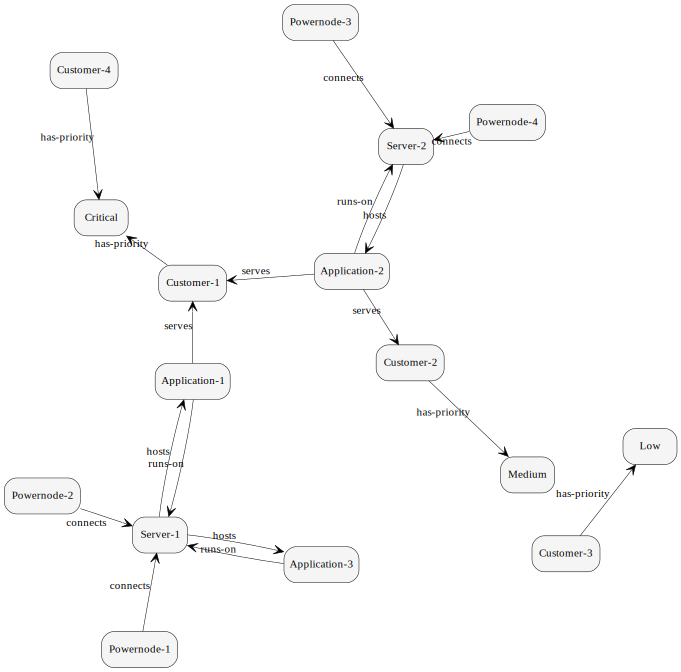

In [4]:
onto.draw_graph(layout='force directed',show={"relations"})
### CogniPy allows also to plot different layouts (uncomment line below to plot using 'hierarchical output')
#onto.draw_graph(layout='hierarchical')


### Testing

In [5]:
import json

def printReasoningInfo(onto):
    info=onto.reasoningInfo()
    if info == "":
        print('all good!')
    else:
        print(json.dumps(json.loads(info), indent=2, sort_keys=True))

def printWhy(onto,fact):
    info=json.loads(onto.why(fact))
    print(json.dumps(info, indent=2, sort_keys=True))


In [6]:
printReasoningInfo(onto)

{
  "modals": {
    "Every application can serve a customer.\r\n": [
      {
        "?x0": {
          "instance": "Application-3"
        }
      }
    ]
  }
}


As we see "Every application can serve a customer." We would probably expect onto modality
that says "Every application should serve a customer", because "can" leaves us with probability of unserved customer. 
Let's further investigate this with some explortion and testing.  

## Exploring the ontology

In [7]:
applications=onto.select_instances_of("application")
servers=onto.select_instances_of("server")
customers=onto.select_instances_of("customer")
powernodes=onto.select_instances_of("powernode")
status=onto.select_instances_of("priority")

type(customers)

pandas.core.frame.DataFrame

Displaying exemplary dataframe resulting from select_instances_of 'funcionality'


In [8]:
display(customers)


,Instance,has-priority
0,Customer-4,Critical
1,Customer-3,Low
2,Customer-2,Medium
3,Customer-1,Critical


###   Let's check now if every customer is served

In [9]:
print(onto.select_instances_of("a thing that serves a customer")[["Instance","serves"]])


        Instance                    serves
0  Application-2  [Customer-2, Customer-1]
1  Application-3                      None
2  Application-1                Customer-1


### Application-3 is not serving any customer; From the previously plotted graph, and the output in previous cell we can also see that Customer-3 and Customer-4 is not served by any application.

### Let's update the Simple_IT ontology such that: (i) every customer is served, (ii) every application is used, and (iii) the modality states that: "Every application should serve a customer." 




### We write new file based on the previously created Simple_IT ontology.  

In [10]:
%%writefile Simple_IT_02.encnl
Title: 'Simple IT Infrastructure'.
Author: 'Cognitum'.

Comment: 'Sample IT ontology'.
Namespace: 'http://ontorion.com/IT_Infra'.

Part-1:  Server--------------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What is a server ?            
 * Who-Or-What is hosted by Server-1 ?  
 * Who-Or-What runs-on Server-2 ?         
//////////////////////////////////////////////////////////.
 
Server-1 is a server.
Server-1 hosts Application-1.
Application-3 is hosted by Server-1.

Server-2 is a server.
Server-2 hosts Application-2.

Every server should host an application.
Every server must have-status a thing that is either Operable or Inoperable. 
 
If a server hosts an application then the application runs-on the server. 

Part-2: Application---------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What serves a customer ?
 * Who-Or-What serves Customer-1 ?           
 * Who-Or-What is served by Application-2 ?  
///////////////////////////////////////////////////////////.

Application-1 is an application.
Application-1 serves Customer-1.

Application-2 is an application.
Application-2 serves Customer-1 and serves Customer-2.

Application-3 is an application.
Application-3 serves Customer-3 and serves Customer-4.

Every application should serve a customer.
Every application must be hosted by a server.

Every application must have-status a thing that is either Operable or Inoperable. 

Part-3: Customers------------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What is a customer that has-priority Low ?          
 * Who-Or-What is a high-priority-customer ?                   
 * Who-Or-What serves a customer that has-priority Critical ? 
 * Who-Or-What serves a customer that is a high-priority-customer ?  
//////////////////////////////////////////////////////////.

Customer-1 is a customer.
Customer-1 has-priority Critical.

Customer-2 is a customer.
Customer-2 has-priority Medium.

Customer-3 is a customer and has-priority Low.

Customer-4 is a customer and has-priority Critical.


Every customer must have-priority a priority.
Something is a priority if-and-only-if-it is either Critical or Medium or Low. 
Every customer that has-priority Critical is a high-priority-customer.
Every customer should be served by an application.

Part-4: Power Node------------------------------.
Comment: ////// Examples of Possible Questions ////////////
 * Who-Or-What connects Server-1?
 * Who-Or-What is connected by Powernode-1?
//////////////////////////////////////////////////////////.

Powernode-1 is a powernode.
Powernode-1 connects Server-1.

Powernode-2 is a powernode.
Powernode-2 connects Server-1.

Powernode-3 is a powernode.
Powernode-3 connects Server-2.

Powernode-4 is a powernode.
Powernode-4 connects Server-2.

Every powernode connects nothing-but server. 
Every powernode must have-status a thing that is either Operable or Inoperable. 







Writing Simple_IT_02.encnl


In [11]:
onto_new_modality=Ontology("cnl/file","Simple_IT_02.encnl",
                    evaluator = lambda e:eval(e,globals(),locals()),
                    graph_attribute_formatter = graph_attribute_formatter)


Let's test ontology with updated modality

In [12]:
printReasoningInfo(onto_new_modality)

all good!


## Let's draw graph of the Simple_IT ontology updated with functionality of Application-3 that serves Customer-3 and Customer-4.

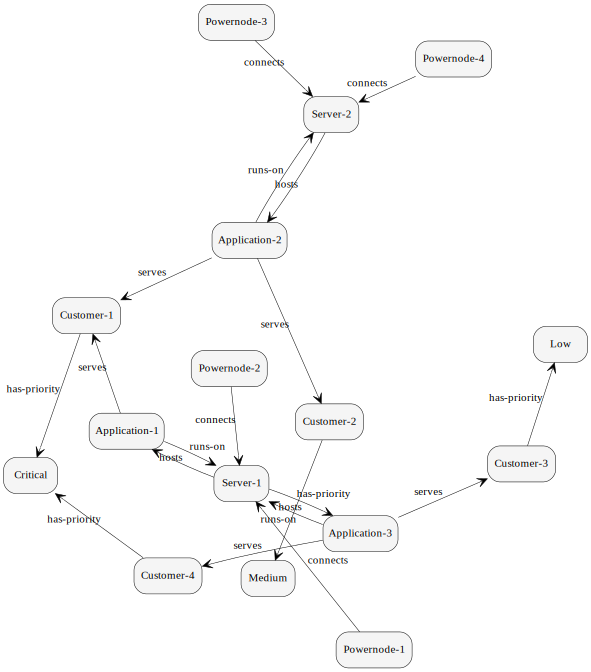

In [13]:
onto_new_modality.draw_graph(layout='force directed',show={"relations"})

### Some basic dataframes operations

In [14]:
df = pd.DataFrame(data=applications["Instance"])
display(df)

# print elements of ontology using the for loop 
for item in df['Instance']:
    print(item)

,Instance
0,Application-3
1,Application-2
2,Application-1


Application-3
Application-2
Application-1


Let's use the lambda function to convert full names of instances in our ontology, such that only numerals are left. 

In [15]:
df = df.assign(Instance = lambda x: x['Instance'].str.extract('(\d+)'))
display(df)
df.describe()

,Instance
0,3
1,2
2,1


,Instance
count,3
unique,3
top,1
freq,1


In [16]:
df1 = pd.DataFrame(
  {"Application": applications['Instance'], "Server": applications['runs-on'],"Customer": applications['serves']})
display(df1)

print('First data frame:')
display(df1)

df2 = pd.DataFrame(
  {"Servers": servers['Instance'], "Application": servers['hosts']})
print('Second data frame:')
display(df2)

df3 = pd.DataFrame(
  {"Powernode": powernodes['Instance'], "Server": powernodes['connects']})
print('Second data frame:')
display(df3)

df3_merged = pd.merge(df1, df3)
display(df3_merged)


pd.to_pickle(df3_merged,'df3_merged.pkl')
df3_merged_pickle=pd.read_pickle('df3_merged.pkl')
df3_merged_pickle

,Application,Server,Customer
0,Application-3,Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed"""
1,Application-2,Server-2,"[Customer-2, Customer-1]"
2,Application-1,Server-1,Customer-1


First data frame:


,Application,Server,Customer
0,Application-3,Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed"""
1,Application-2,Server-2,"[Customer-2, Customer-1]"
2,Application-1,Server-1,Customer-1


Second data frame:


,Servers,Application
0,Server-2,Application-2
1,Server-1,"[Application-3, Application-1]"


Second data frame:


,Powernode,Server
0,Powernode-4,Server-2
1,Powernode-3,Server-2
2,Powernode-2,Server-1
3,Powernode-1,Server-1


,Application,Server,Customer,Powernode
0,Application-3,Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed""",Powernode-2
1,Application-3,Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed""",Powernode-1
2,Application-1,Server-1,Customer-1,Powernode-2
3,Application-1,Server-1,Customer-1,Powernode-1
4,Application-2,Server-2,"[Customer-2, Customer-1]",Powernode-4
5,Application-2,Server-2,"[Customer-2, Customer-1]",Powernode-3


,Application,Server,Customer,Powernode
0,Application-3,Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed""",Powernode-2
1,Application-3,Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed""",Powernode-1
2,Application-1,Server-1,Customer-1,Powernode-2
3,Application-1,Server-1,Customer-1,Powernode-1
4,Application-2,Server-2,"[Customer-2, Customer-1]",Powernode-4
5,Application-2,Server-2,"[Customer-2, Customer-1]",Powernode-3


# GroupBy

In [17]:
df4=df3_merged.groupby("Powernode").sum()
display(df4)

df5=df3_merged.groupby("Powernode").count()
display(df5)

df4.loc[df4.astype(str).drop_duplicates().index]

df4

,Application,Server,Customer
Powernode,,,
Powernode-1,Application-3Application-1,Server-1Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed""Cust..."
Powernode-2,Application-3Application-1,Server-1Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed""Cust..."
Powernode-3,Application-2,Server-2,"[Customer-2, Customer-1]"
Powernode-4,Application-2,Server-2,"[Customer-2, Customer-1]"


,Application,Server,Customer
Powernode,,,
Powernode-1,2,2,2
Powernode-2,2,2,2
Powernode-3,1,1,1
Powernode-4,1,1,1


,Application,Server,Customer
Powernode,,,
Powernode-1,Application-3Application-1,Server-1Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed""Cust..."
Powernode-2,Application-3Application-1,Server-1Server-1,"The-""36993b81-ee7c-4852-abd9-f2d39be3ebed""Cust..."
Powernode-3,Application-2,Server-2,"[Customer-2, Customer-1]"
Powernode-4,Application-2,Server-2,"[Customer-2, Customer-1]"


In [18]:
per_server_powernode=df3.groupby("Server").sum()
per_server_powernode

,Powernode
Server,
Server-1,Powernode-2Powernode-1
Server-2,Powernode-4Powernode-3


## Examples of sparql queries to extract useful informations from the Simple_IT ontology

For instance let's compare queries results listing applications and customers, obtained for
our initial Simple_IT ontology, and Simple_IT ontology with updated modality. 

In [19]:
#Simple_IT_01.encnl case
display(onto.sparql_query(CQL("""select ?app ?customer {
                            ?app rdf:type <application>. 
                            ?customer rdf:type <customer>. 
                            ?app <serves> ?customer. 
                        }""","http://ontorion.com/IT_Infra#")))

#Simple_IT_02.encnl case
display(onto_new_modality.sparql_query(CQL("""select ?app ?customer {
                            ?app rdf:type <application>. 
                            ?customer rdf:type <customer>. 
                            ?app <serves> ?customer. 
                        }""","http://ontorion.com/IT_Infra#")))                      


,app,customer
0,Application-2,Customer-2
1,Application-2,Customer-1
2,Application-2,Customer-1
3,Application-1,Customer-1
4,Application-1,Customer-1


,app,customer
0,Application-3,Customer-4
1,Application-3,Customer-4
2,Application-3,Customer-3
3,Application-2,Customer-2
4,Application-2,Customer-1
5,Application-2,Customer-1
6,Application-1,Customer-1
7,Application-1,Customer-1


Clearly more served clustomers means more positions in the table. However, apart from useful information,
we also got some repetetions. 

Let's add 'distinct' to our queries, and obtain tables with only useful data.

In [20]:
#Simple_IT_01.encnl case 
display(onto.sparql_query(CQL("""select distinct ?app ?customer {
                            ?app rdf:type <application>. 
                            ?customer rdf:type <customer>. 
                            ?app <serves> ?customer. 
                        }""","http://ontorion.com/IT_Infra#")))

#Simple_IT_02.encnl case
display(onto_new_modality.sparql_query(CQL("""select distinct ?app ?customer {
                            ?app rdf:type <application>. 
                            ?customer rdf:type <customer>. 
                            ?app <serves> ?customer. 
                        }""","http://ontorion.com/IT_Infra#"))) 

,app,customer
0,Application-2,Customer-2
1,Application-2,Customer-1
2,Application-1,Customer-1


,app,customer
0,Application-3,Customer-4
1,Application-3,Customer-3
2,Application-2,Customer-2
3,Application-2,Customer-1
4,Application-1,Customer-1


## Now let's use sparql to get tabulated data reflecting whole complexity of our ontologies.

In [22]:
df2=onto.sparql_query(CQL("""select distinct ?application ?customer ?server ?powernode ?priority{
                            ?application rdf:type <application>.
                            ?customer rdf:type <customer>.
                            ?server rdf:type <server>.
                            ?priority rdf:type <priority>.
                            ?application <serves> ?customer.
                            ?powernode <connects> ?server.
                            ?customer <has-priority> ?priority.
                            ?server <hosts> ?application.
                        }""","http://ontorion.com/IT_Infra#"))

print('Query result when only 2 customers are served')
display(df2)


df4=onto.sparql_query(CQL("""select distinct ?application ?customer ?server ?powernode ?priority{
                            ?application rdf:type <application>.
                            ?customer rdf:type <customer>.
                            ?server rdf:type <server>.
                            ?priority rdf:type <priority>.
                            ?application <serves> ?customer.
                            ?powernode <connects> ?server.
                            ?customer <has-priority> ?priority.
                            ?server <hosts> ?application.
                            } ""","http://ontorion.com/IT_Infra#"))

print('Query result when 4 (all) customers are served')
display(df4)

Query result when only 2 customers are served


,application,customer,server,powernode,priority
0,Application-2,Customer-2,Server-2,Powernode-4,Medium
1,Application-2,Customer-2,Server-2,Powernode-3,Medium
2,Application-2,Customer-1,Server-2,Powernode-4,Critical
3,Application-2,Customer-1,Server-2,Powernode-3,Critical
4,Application-1,Customer-1,Server-1,Powernode-2,Critical
5,Application-1,Customer-1,Server-1,Powernode-1,Critical


Query result when 4 (all) customers are served


,application,customer,server,powernode,priority
0,Application-2,Customer-2,Server-2,Powernode-4,Medium
1,Application-2,Customer-2,Server-2,Powernode-3,Medium
2,Application-2,Customer-1,Server-2,Powernode-4,Critical
3,Application-2,Customer-1,Server-2,Powernode-3,Critical
4,Application-1,Customer-1,Server-1,Powernode-2,Critical
5,Application-1,Customer-1,Server-1,Powernode-1,Critical
